## A demo of K-Means clustering on the handwritten digits data
Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [21]:
%matplotlib inline
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [22]:
np.random.seed(42)

In [23]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [24]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300
print("n_digits: %d, \t n_samples %d, \t n_features %d" 
      % (n_digits, n_samples, n_features))
print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')
print(79 * '_')
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name='k-means++', data = data)
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name='random', data = data)
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init = 1),
              name="PCA-based",
              data = data)

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
_______________________________________________________________________________
k-means++   0.48s    69432   0.602   0.650   0.625   0.465   0.598    0.146
   random   0.31s    69694   0.669   0.710   0.689   0.553   0.666    0.147
PCA-based   0.04s    71820   0.673   0.715   0.693   0.567   0.670    0.150


In [25]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init = 10)
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')
print(79 * '_')
bench_k_means(kmeans, name='pca-reduced', data = data)
kmeans.fit(reduced_data)

init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
_______________________________________________________________________________
pca-reduced   0.27s    69467   0.610   0.658   0.633   0.478   0.606    0.146


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [26]:
# Plot the Decision Boundary
h = .02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

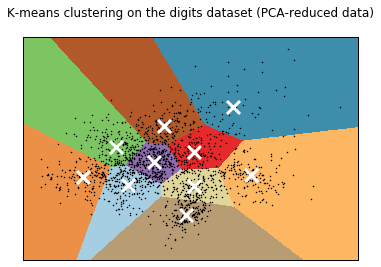

In [27]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(x_min, x_max, y_min, y_max),
           cmap = plt.cm.Paired,
           aspect = 'auto', origin='lower')

plt.plot(reduced_data[:,0], reduced_data[:, 1], 'k.', markersize = 2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:, 1],
            marker='x', s = 169, linewidths=3,
            color='w', zorder = 10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()